In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import seaborn as sns

In [2]:
DATA_PATH = 'data/data.csv'
PRODUCTS_PATH = 'data/products.csv'

In [3]:
data =  pd.read_csv(DATA_PATH, sep=',', parse_dates=['doc_date', 'created_at'])
data.head()

,order_price_without_vat,order_price_with_vat,bill_country,setting_currency_id,created_at,shop_basket_id,doc_date,exchange_currency_rate,source,currency_code,...,catalog_segment_id,categories_ancestor_ids,categories_descendant_ids,category_full_name_path,default_warranty_period,brand_name,brand_parameterized,segment_name,segment_parameterezied,segment_status
0,32724.41,41560.00,HU,10,2020-04-26 19:25:42.059702,812554,2020-04-26,359.9200,eshop,HUF,...,13.0,"{1,2014}",{},"{""Muziker Merch"",""Merch - Miscellaneous""}",24.0,Muziker,muziker,General,general,inactive
1,28.52,34.79,IT,6,2020-04-26 19:26:32.223119,1182415,2020-04-26,1.0000,eshop,EUR,...,13.0,"{1,2014}",{},"{""Muziker Merch"",""Merch - Miscellaneous""}",24.0,Muziker,muziker,General,general,inactive
2,929.41,1106.00,RO,13,2022-02-03 13:56:28.395746,4358127,2022-02-03,4.9463,eshop,RON,...,4.0,"{1327,1572,1580}",{},"{Boats,""Paint / Care / Tools"",""Cleaning / Care...",24.0,Star Brite,star-brite,Boats,boats,active
3,125.33,150.39,SK,6,2020-04-26 19:24:18.330764,1173713,2020-04-26,1.0000,eshop,EUR,...,1.0,"{3,4,5}",{},"{Music,Guitars,""Electric Guitars"",ST-Type}",24.0,ABX,abx,Music,music,active
4,20.58,24.70,FR,6,2020-04-26 19:17:46.399952,1182405,2020-04-26,1.0000,eshop,EUR,...,1.0,"{3,4,5}",{},"{Music,Guitars,""Electric Guitars"",""Hard & Heavy""}",24.0,Jackson,jackson,Music,music,active


In [4]:
products = pd.read_csv(PRODUCTS_PATH, sep=',')
products.head()

,variant_id,category_id,brand_id,status,is_new,reviews_count,reviews_average_score_price,reviews_average_score_quality,reviews_average_score_properties,reviews_average_score_overall,in_sets_count,is_in_stock,is_returnable,purchase_price,eshop_stock_count,country_of_origin_code,name
0,45528,2759.0,586.0,active,f,0,0.0,0.0,0.0,0.0,0,f,t,2317.000000,0.0,DE,Saphir 41/120/IV/11/5 Green
1,293638,1138.0,872.0,active,f,1,0.0,0.0,0.0,0.0,0,t,t,28.280000,2.0,CN,Roshe G Junior Golf Shoes Lime US 7Y
2,211291,2117.0,4959.0,ended,f,0,0.0,0.0,0.0,0.0,0,f,t,1.230000,0.0,CN,Flora 21 Pink
3,327605,2042.0,2088.0,active,f,0,0.0,0.0,0.0,0.0,0,t,f,15.915556,9.0,DE,Guitar Shop (LP)
4,243315,2142.0,6525.0,active,f,2,0.0,0.0,0.0,0.0,0,t,t,7.597500,17.0,PT,PC951 9-Speed Chain


In [5]:
data.dtypes

order_price_without_vat                               float64
order_price_with_vat                                  float64
bill_country                                           object
setting_currency_id                                     int64
created_at                                     datetime64[ns]
shop_basket_id                                          int64
doc_date                                       datetime64[ns]
exchange_currency_rate                                float64
source                                                 object
currency_code                                          object
currency_symbol                                        object
price_round_system                                      int64
basket_total_price_before_discount_with_vat           float64
basket_total_price_with_vat                           float64
count_basket_items                                      int64
basket_count_products                                   int64
basket_t

In [6]:
products.dtypes

variant_id                            int64
category_id                         float64
brand_id                            float64
status                               object
is_new                               object
reviews_count                         int64
reviews_average_score_price         float64
reviews_average_score_quality       float64
reviews_average_score_properties    float64
reviews_average_score_overall       float64
in_sets_count                         int64
is_in_stock                          object
is_returnable                        object
purchase_price                      float64
eshop_stock_count                   float64
country_of_origin_code               object
name                                 object
dtype: object

In [7]:
data.shape

(1156071, 56)

In [8]:
products.shape

(351053, 17)

In [9]:
data.isnull().sum()

order_price_without_vat                            0
order_price_with_vat                               0
bill_country                                       0
setting_currency_id                                0
created_at                                         0
shop_basket_id                                     0
doc_date                                          32
exchange_currency_rate                             0
source                                             0
currency_code                                      0
currency_symbol                                    0
price_round_system                                 0
basket_total_price_before_discount_with_vat        0
basket_total_price_with_vat                        0
count_basket_items                                 0
basket_count_products                              0
basket_type                                        0
item_quantity                                      0
item_type                                     

In [22]:
# Dropping all NaNs from the data dataframe, since they are in important columns
data.dropna(inplace=True)

In [10]:
products.isnull().sum()

variant_id                              0
category_id                          7078
brand_id                                2
status                                  0
is_new                                  0
reviews_count                           0
reviews_average_score_price             0
reviews_average_score_quality           0
reviews_average_score_properties        0
reviews_average_score_overall           0
in_sets_count                           0
is_in_stock                             0
is_returnable                           0
purchase_price                      52581
eshop_stock_count                       0
country_of_origin_code              16109
name                                    1
dtype: int64

## **Data.csv insights**

In [136]:
def create_others_value_counts(threshold : float, df : pd.DataFrame, column_name : str) -> pd.Series:
    """
    Function which groups all of the values under threshold into 'others' with preserving of original categories
    Args
        threshold - float in range <0,1> as a threshold for key to be marked as others (desired percentage / 100)
        df - desired DataFrame containing given column
        column_name - string with the exact name of a desired Series
    Returns
        pd.Series - returns Series with the new 'others' group
    """
    
    over_thr = df[column_name].value_counts(normalize=True).loc[lambda x : x > threshold]
    under_thr = df[column_name].value_counts(normalize=True).loc[lambda x : x <= threshold]
    merged_series =  pd.concat([over_thr, pd.Series(under_thr.sum(), index=['others'])])
    return merged_series

In [137]:
# calculate how many brands there are as well as the most common
print(data.brand_name.value_counts())

Muziker                 192576
Fender                   49255
Behringer                27966
Dunlop                   27559
Yamaha                   27033
                         ...  
Flamengo                     1
Blinded By The Light         1
Robin Schulz                 1
Skyforger                    1
Fatal Fusion                 1
Name: brand_name, Length: 3185, dtype: int64


In [197]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 80
plt.rcParams['axes.facecolor'] = 'FFFFFF'
plt.rcParams['legend.facecolor'] = 'FFFFFF'
plt.rcParams['patch.facecolor'] = 'FFFFFF'
# figure().patch.set_facecolor('white')

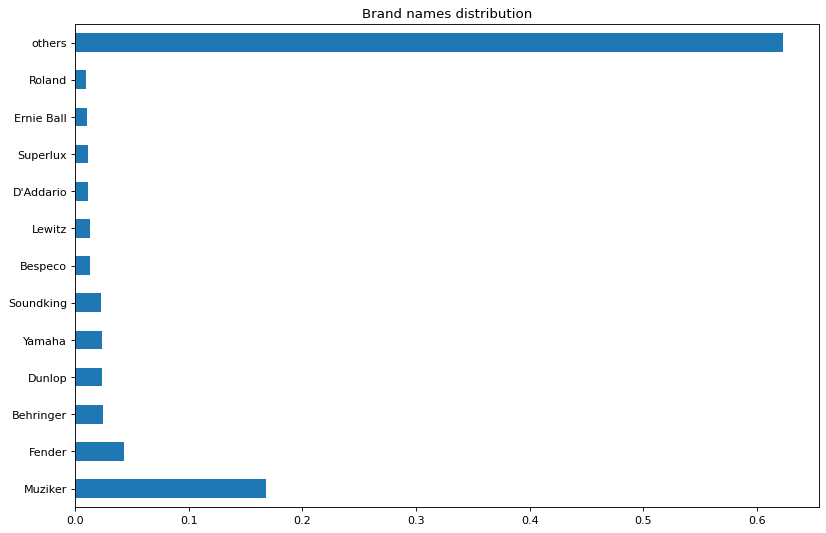

In [191]:
counted_countries = create_others_value_counts(0.01, data, 'brand_name') 
counted_countries.plot(kind='barh', title='Brand names distribution')
plt.show()

As we can see above, there is HUGE variety of brands in products (3185) with only 12 of them having more than 1% of products.

Percentage of bill countries, with the threshold of 1% to be shown as bill country of an order.

Bill countries in data: ['HU' 'IT' 'RO' 'SK' 'FR' 'AT' 'HR' 'CZ' 'BG' 'DE' 'SI' 'PL' 'IE' 'GB'
 'DK' 'BE' 'NL' 'LV' 'SE' 'PT' 'EE' 'ES' 'LT' 'CH' 'LU' 'UA' 'FI' 'EL'
 'GR' 'TR' 'BA' 'RS'].
 That is 32 countries


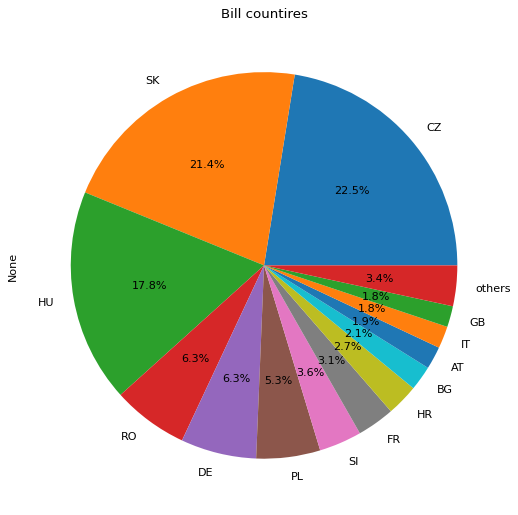

In [211]:
print(f'Bill countries in data: {data.bill_country.unique()}.\n That is {len(data.bill_country.unique())} countries as bill countries.')

figure().patch.set_facecolor('white')
counted_countries = create_others_value_counts(0.01, data, 'bill_country') 
counted_countries.plot(kind='pie', autopct='%1.1f%%', title='Bill countires')
plt.show()

In [224]:
TODO = list(data.columns)
TODO.remove('bill_country')
TODO.remove('brand_name')

In [225]:
TODO

['order_price_without_vat',
 'order_price_with_vat',
 'setting_currency_id',
 'created_at',
 'shop_basket_id',
 'doc_date',
 'exchange_currency_rate',
 'source',
 'currency_code',
 'currency_symbol',
 'price_round_system',
 'basket_total_price_before_discount_with_vat',
 'basket_total_price_with_vat',
 'count_basket_items',
 'basket_count_products',
 'basket_type',
 'item_quantity',
 'item_type',
 'item_unit_price_with_vat',
 'item_unit_price_without_vat',
 'item_total_discount_with_vat',
 'product_id',
 'product_code',
 'catalog_category_id',
 'catalog_brand_id',
 'product_name',
 'product_status',
 'reviews_count',
 'reviews_average_score_price',
 'reviews_average_score_quality',
 'reviews_average_score_properties',
 'reviews_average_score_overall',
 'reviews_average_score',
 'is_in_stock',
 'is_ended',
 'is_new',
 'is_boosted',
 'product_purchase_price',
 'eshop_stock_count',
 'is_fifo',
 'product_name_parameterize',
 'category',
 'tree_path',
 'category_name_parameterized',
 'categ